In [1]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Nov_30_19:08:53_PST_2020
Cuda compilation tools, release 11.2, V11.2.67
Build cuda_11.2.r11.2/compiler.29373293_0
torch:  2.4 ; cuda:  cu118
detectron2: 0.6


In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random


# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

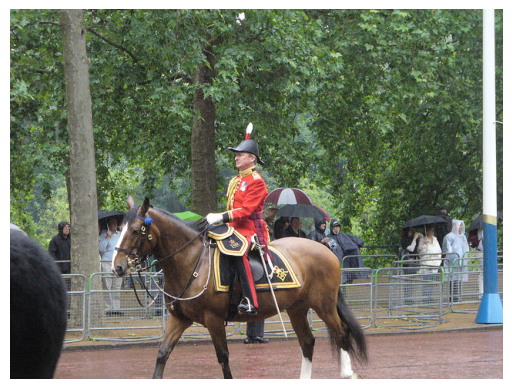

In [10]:
import cv2
from matplotlib import pyplot as plt

# Read the image
im = cv2.imread("./input.jpg")

# Convert image from BGR (OpenCV's default) to RGB
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(im_rgb)
plt.axis('off') # Hide axis
plt.show()


In [11]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[10/08 12:57:24 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


/home/user/miniconda3/envs/jayantevn/lib/python3.12/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [12]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0,  0,  0,  0, 25,  0, 25, 25,  0,  0, 24],
       device='cuda:0')
Boxes(tensor([[126.6011, 244.9034, 459.8285, 480.0000],
        [251.1036, 157.8121, 338.9755, 413.6360],
        [114.8530, 268.6880, 148.2364, 398.8153],
        [  0.8219, 281.0366,  78.6029, 478.4252],
        [ 49.3947, 274.1254,  80.1547, 342.9856],
        [561.2262, 271.5816, 596.2767, 385.2566],
        [385.9050, 270.3108, 413.7125, 304.0394],
        [515.9247, 278.3727, 562.2798, 389.3832],
        [335.2405, 251.9170, 414.7483, 275.9344],
        [350.9267, 269.2094, 386.0968, 297.9085],
        [331.6260, 230.9999, 393.2771, 257.2016],
        [510.7302, 263.2703, 570.9870, 295.9433],
        [409.0875, 271.8648, 460.5588, 356.8723],
        [506.8879, 283.3307, 529.9493, 324.0259],
        [594.5669, 283.4807, 609.0570, 311.4136]], device='cuda:0'))


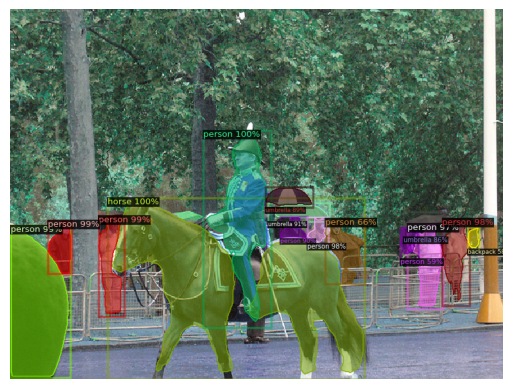

In [14]:
import cv2
from matplotlib import pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Assuming `im` is already defined and read using cv2.imread()
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Display using matplotlib
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis('off')  # Hide axis
plt.show()


In [15]:
from detectron2.data.datasets import register_coco_instances

In [41]:
register_coco_instances("my_dataset_train", {}, "/home/user/JAYANT/importanteee/Dataset/Training/Train.json", "/home/user/JAYANT/importanteee/Dataset/Training")
register_coco_instances("my_dataset_val", {}, "/home/user/JAYANT/importanteee/Dataset/Validation/validation.json", "/home/user/JAYANT/importanteee/Dataset/Validation")

[10/08 13:58:21 d2.data.datasets.coco]: Loaded 53 images in COCO format from /home/user/JAYANT/importanteee/Dataset/Training/Train.json


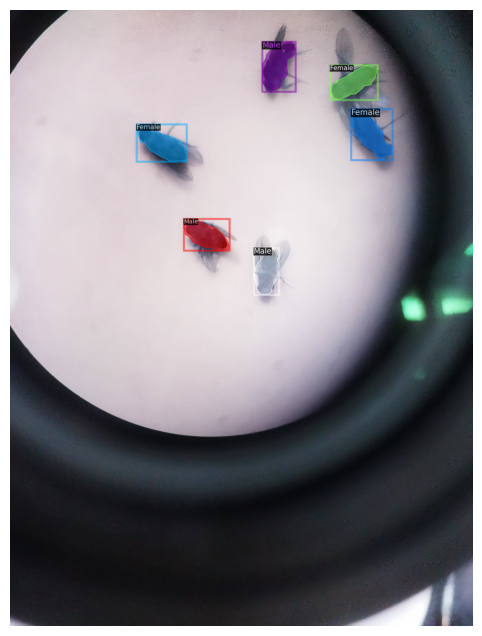

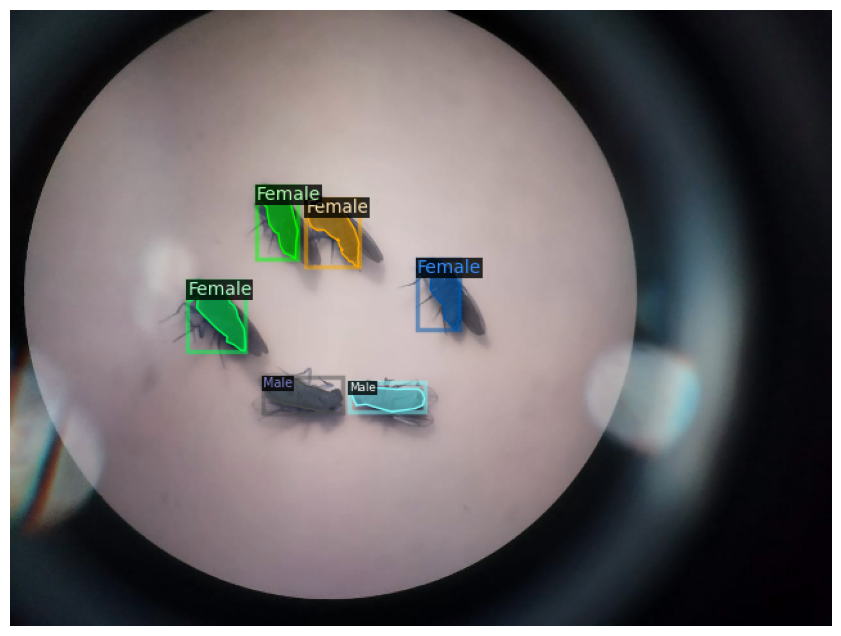

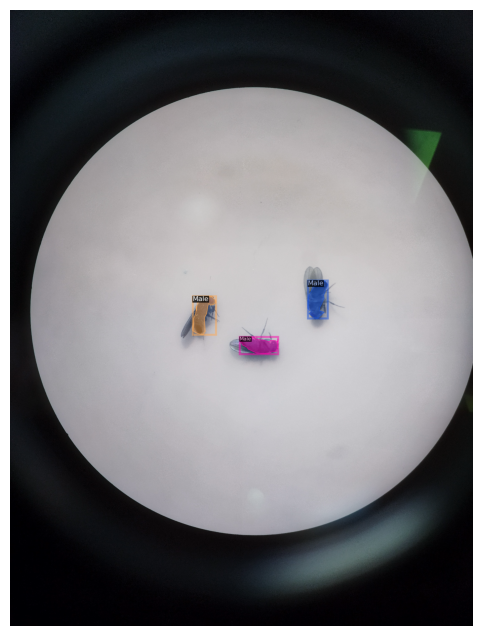

In [29]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
import random
import cv2
from detectron2.utils.visualizer import Visualizer
import matplotlib.pyplot as plt

# Register the datasets
register_coco_instances(
    "my_dataset_train",
    {},
    "/home/user/JAYANT/importanteee/Dataset/Training/Train.json",
    "/home/user/JAYANT/importanteee/Dataset/Training"
)
register_coco_instances(
    "my_dataset_val",
    {},
    "/home/user/JAYANT/importanteee/Dataset/Validation/validation.json",
    "/home/user/JAYANT/importanteee/Dataset/Validation"
)

# Access the metadata and dataset dictionaries
my_dataset_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

# Visualize random samples
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    if img is None:
        print(f"Could not read image {d['file_name']}")
        continue
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.figure(figsize=(12, 8))
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.axis('off')
    plt.show()


In [37]:
def get_my_dataset_dicts(img_dir, json_file_name):
    import os
    import json
    import cv2
    import numpy as np
    from detectron2.structures import BoxMode

    json_file = os.path.join(img_dir, json_file_name)
    with open(json_file) as f:
        imgs_anns = json.load(f)

    print(f"Type of imgs_anns: {type(imgs_anns)}")

    # Determine if imgs_anns is a list or dict
    if isinstance(imgs_anns, dict):
        imgs_anns_list = list(imgs_anns.values())
    elif isinstance(imgs_anns, list):
        imgs_anns_list = imgs_anns
    else:
        raise ValueError("Unsupported JSON format")

    dataset_dicts = []

    for idx, v in enumerate(imgs_anns_list):
        print(f"Index: {idx}, Type of v: {type(v)}")
        print(f"Content of v: {v}")

        if not isinstance(v, dict):
            print(f"Skipping index {idx} because v is not a dict")
            continue

        record = {}

        # Access the filename
        filename = v.get("filename") or v.get("file_name")
        if not filename:
            print(f"No 'filename' key in entry {idx}")
            continue

        full_filename = os.path.join(img_dir, filename)
        if not os.path.exists(full_filename):
            print(f"File {full_filename} does not exist.")
            continue

        # Read image to get dimensions
        image = cv2.imread(full_filename)
        if image is None:
            print(f"Could not read image {full_filename}")
            continue
        height, width = image.shape[:2]

        record["file_name"] = full_filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width

        # Access annotations
        annos = v.get("regions") or v.get("annotations")
        if annos is None:
            print(f"No 'regions' or 'annotations' key in entry {idx}")
            continue

        objs = []
        for anno in annos:
            # Extract the class label from region_attributes or directly from anno
            attributes = anno.get("region_attributes", {}) or anno.get("attributes", {})
            class_label = attributes.get("class", None) or anno.get("category")

            if class_label not in ["male", "female"]:
                print(f"Invalid class label '{class_label}' in entry {idx}")
                continue  # Skip annotations without a valid class label

            # Map class labels to category IDs
            category_id = 0 if class_label == "male" else 1

            shape_attrs = anno.get("shape_attributes", {}) or anno.get("segmentation", {})
            px = shape_attrs.get("all_points_x") or shape_attrs.get("points_x")
            py = shape_attrs.get("all_points_y") or shape_attrs.get("points_y")

            if not px or not py:
                print(f"Missing polygon points in entry {idx}")
                continue  # Skip invalid annotations

            if len(px) < 3 or len(py) < 3:
                print(f"Invalid polygon with less than 3 points in entry {idx}")
                continue  # Polygons must have at least 3 points

            poly = [(x, y) for x, y in zip(px, py)]
            poly_flat = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly_flat],
                "category_id": category_id,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)

    print(f"Returning dataset_dicts of type: {type(dataset_dicts)} with length: {len(dataset_dicts)}")
    return dataset_dicts


In [46]:
import os
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo

# Create a Detectron2 configuration
cfg = get_cfg()

# Load the base configuration from the model zoo
cfg.merge_from_file(
    model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
)

# Update the dataset names to match the ones you've registered
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

# Number of data loading threads
cfg.DATALOADER.NUM_WORKERS = 2

# Initialize the model weights from a model pre-trained on COCO
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)

# Set the batch size per image (adjust based on your GPU memory)
cfg.SOLVER.IMS_PER_BATCH = 2  # Number of images per batch across all machines

# Set the base learning rate (adjust as needed)
cfg.SOLVER.BASE_LR = 0.00025

# Set the maximum number of iterations (adjust based on your dataset size)
cfg.SOLVER.MAX_ITER = 1000

# Learning rate decay steps (empty means no decay)
cfg.SOLVER.STEPS = []

# Number of regions per image used for training the ROI heads
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128

# Number of classes (excluding background)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # 'male' and 'female'

# Output directory (ensure it exists)
cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


In [47]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator
import os

class MyTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        # Create evaluator(s) for the given dataset
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        os.makedirs(output_folder, exist_ok=True)
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

# Set the evaluation period (e.g., evaluate every 500 iterations)
cfg.TEST.EVAL_PERIOD = 500


In [48]:
# Initialize the custom trainer
trainer = MyTrainer(cfg)

# Start training
trainer.resume_or_load(resume=False)
trainer.train()


[10/08 14:20:08 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (2, 256, 1, 1) in

[10/08 14:20:08 d2.engine.train_loop]: Starting training from iteration 0
[10/08 14:20:13 d2.utils.events]:  eta: 0:03:35  iter: 19  total_loss: 2.522  loss_cls: 1.095  loss_box_reg: 0.6932  loss_mask: 0.6945  loss_rpn_cls: 0.04039  loss_rpn_loc: 0.01907    time: 0.2315  last_time: 0.2683  data_time: 0.1273  last_data_time: 0.1397   lr: 4.9953e-06  max_mem: 2838M
[10/08 14:20:18 d2.utils.events]:  eta: 0:03:51  iter: 39  total_loss: 2.483  loss_cls: 1.002  loss_box_reg: 0.7058  loss_mask: 0.6912  loss_rpn_cls: 0.04698  loss_rpn_loc: 0.02218    time: 0.2359  last_time: 0.2444  data_time: 0.1179  last_data_time: 0.1322   lr: 9.9902e-06  max_mem: 2838M
[10/08 14:20:22 d2.utils.events]:  eta: 0:03:47  iter: 59  total_loss: 2.333  loss_cls: 0.8437  loss_box_reg: 0.7503  loss_mask: 0.6835  loss_rpn_cls: 0.02353  loss_rpn_loc: 0.01832    time: 0.2332  last_time: 0.3475  data_time: 0.1008  last_data_time: 0.2106   lr: 1.4985e-05  max_mem: 2838M
[10/08 14:20:27 d2.utils.events]:  eta: 0:03:46  

In [50]:
# Assuming you have a JSON annotation file named 'Test.json'
# and you have annotations similar to your training and validation datasets

# Register the test dataset
from detectron2.data import DatasetCatalog, MetadataCatalog

img_dir = "/home/user/JAYANT/importanteee/Dataset/Test"
json_file = "Test.json"
dataset_name = "my_dataset_test"

thing_classes = ["male", "female"]  # Ensure this matches your classes

if dataset_name not in DatasetCatalog.list():
    DatasetCatalog.register(
        dataset_name,
        lambda img_dir=img_dir, json_file=json_file: get_my_dataset_dicts(img_dir, json_file)
    )
    MetadataCatalog.get(dataset_name).set(thing_classes=thing_classes)
else:
    print(f"Dataset '{dataset_name}' is already registered.")



[10/08 14:30:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


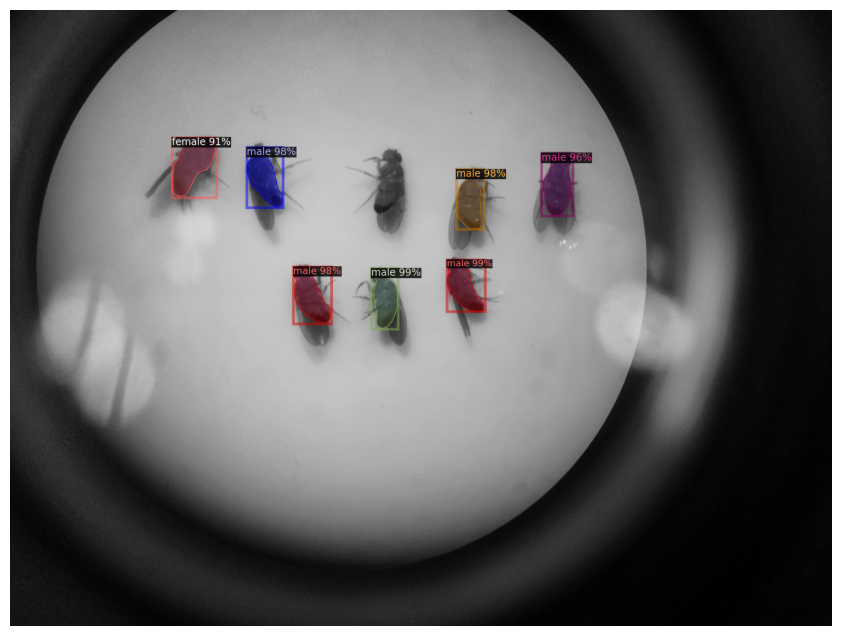

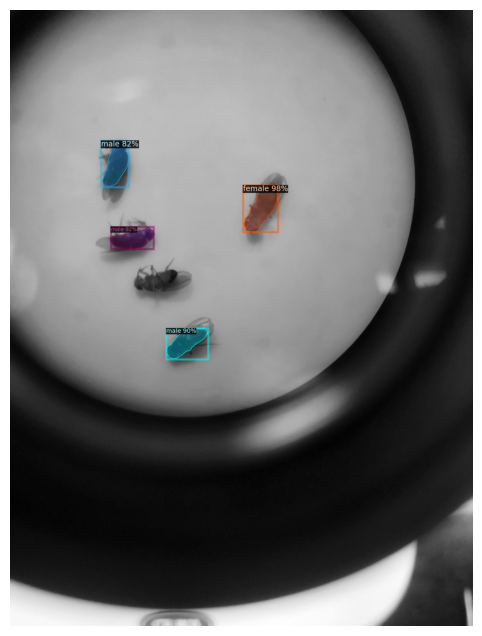

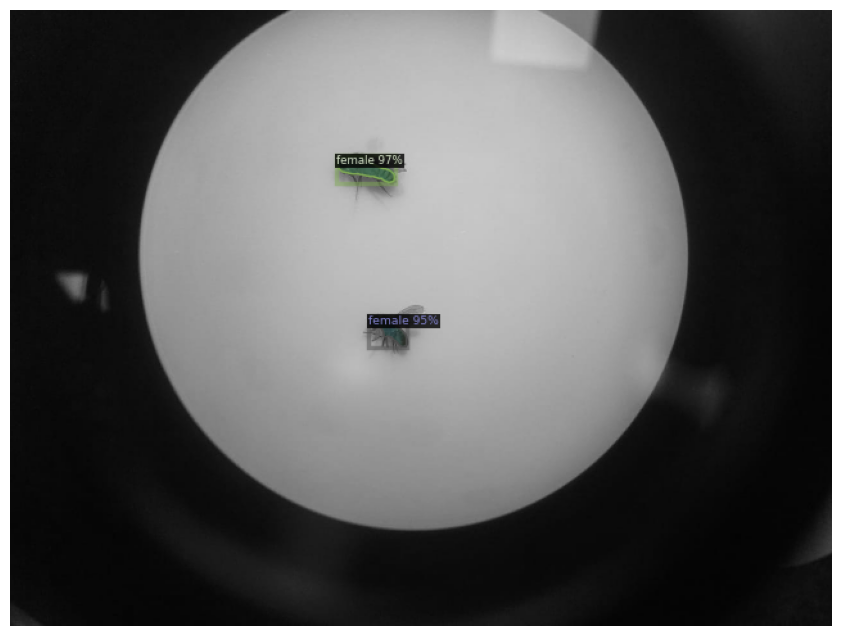

In [52]:
import os
import glob
import random
import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.engine import DefaultPredictor

# Update the config for inference
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # Adjust threshold as needed

# No need to set cfg.DATASETS.TEST since we're loading images directly
# Create a predictor using the trained model
predictor = DefaultPredictor(cfg)

# Use the metadata from your training dataset for visualization
my_dataset_metadata = MetadataCatalog.get("my_dataset_training")

# Path to your test images directory
test_images_path = "/home/user/JAYANT/importanteee/Dataset/Test"

# Get a list of image file paths (adjust extensions if necessary)
image_paths = glob.glob(os.path.join(test_images_path, "*.jpg")) + \
              glob.glob(os.path.join(test_images_path, "*.png")) + \
              glob.glob(os.path.join(test_images_path, "*.jpeg"))

# Randomly select 3 images
sampled_image_paths = random.sample(image_paths, 3)

for image_path in sampled_image_paths:
    # Read the image
    im = cv2.imread(image_path)
    if im is None:
        print(f"Could not read image {image_path}")
        continue

    # Make predictions
    outputs = predictor(im)

    # Visualize the predictions
    v = Visualizer(
        im[:, :, ::-1],
        metadata=my_dataset_metadata,
        scale=0.5,
        instance_mode=ColorMode.IMAGE_BW
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Display the image using matplotlib
    plt.figure(figsize=(12, 8))
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.axis('off')
    plt.show()



In [53]:
output_image = out.get_image()[:, :, ::-1]
output_path = os.path.join("output", os.path.basename(image_path))
cv2.imwrite(output_path, output_image)


True

In [54]:
%load_ext tensorboard
%tensorboard --logdir output
